In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

# k Nearest Neighbors (kNN)
Метод k ближайших соседей рассчитывает расстояния от нового объекта до всех объектов выборки и, отбирая k ближайших, предсказывает целевую переменную с помощью голосования (в случае классификации) или усреднения (в случае регрессии). \
При этом этот метод можно по-разному настраивать, например можно изменить способ подсчета расстояний или способ взвешивания соседей по расстоянию. \
Для начала скачаем датасет и визуализируем данные.

In [3]:
circ = pd.read_csv('concertriccir2.csv')
circ.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


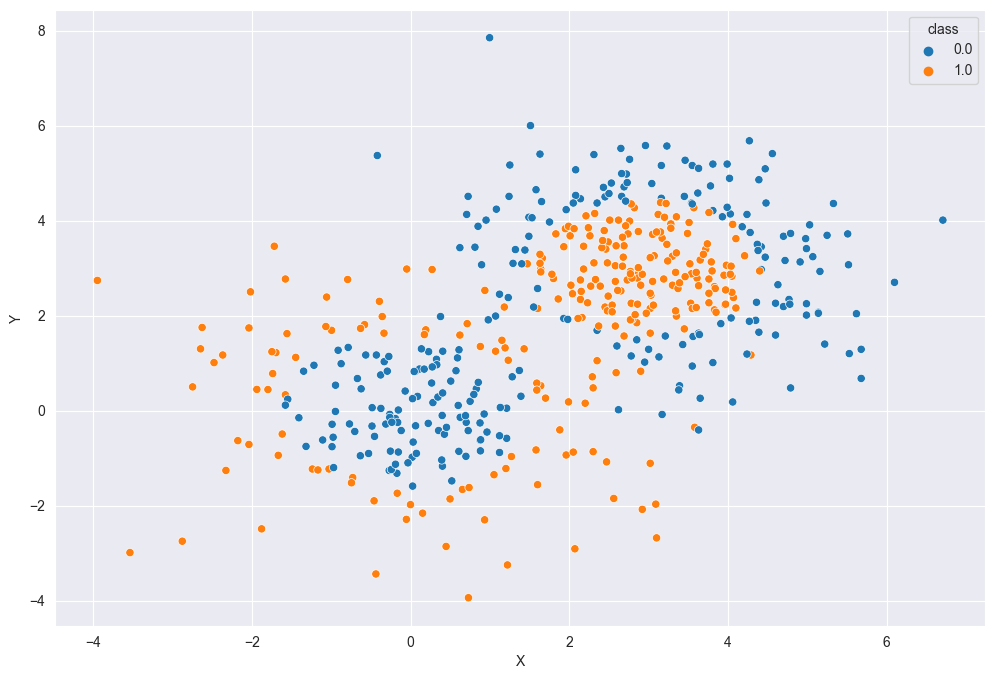

In [5]:
sns.scatterplot(x=circ['X'], y=circ['Y'], hue=circ['class']);

**Задание 1.** Обучите логистическую регрессию на данных и нарисуйте разделяющую гиперплоскость (прямую) на рисунке с данными. Как линейный классификатор справился с задачей? Сделайте вывод исходя из геометрии данных и линии разделения. Какой accuracy выйдет на всей выборке (без валидации)?

In [13]:
X = circ.drop('class', axis=1)
Y = circ["class"]

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X, Y)

### Your code is here


print(f"Accuracy: {np.mean(model.predict(X) == Y).round(3)}")

Accuracy: 0.424


<AxesSubplot: xlabel='X', ylabel='Y'>

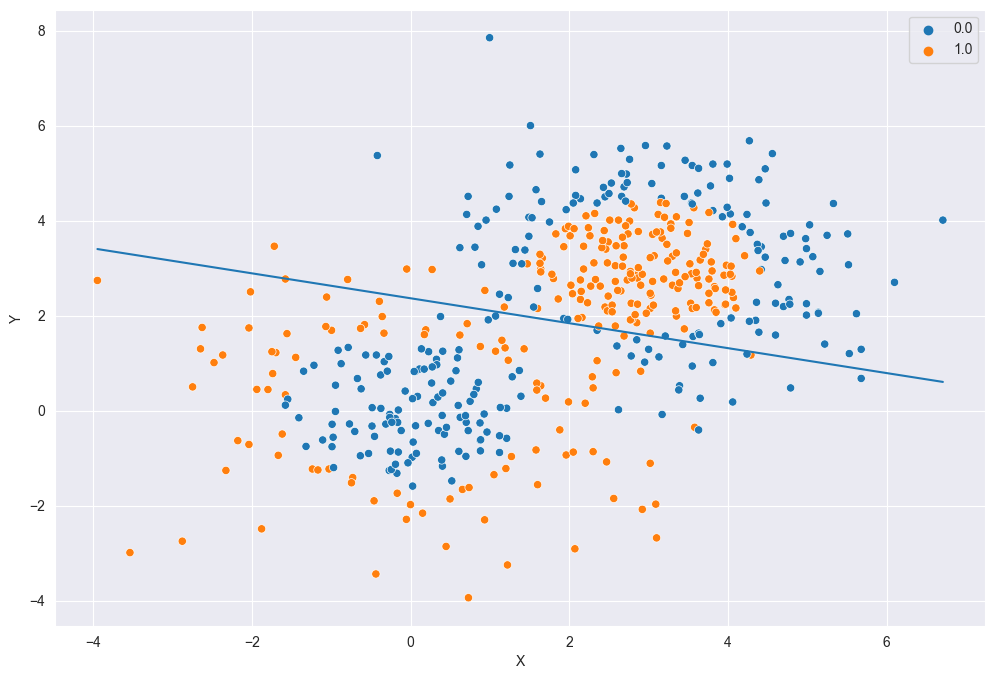

In [21]:
sns.scatterplot(x=circ['X'], y=circ['Y'], hue=circ['class'])
sns.lineplot(x=circ['X'], y = (- ((model.coef_.T[0]) / (model.coef_.T[1])) * circ['X'] ) - (model.intercept_[0] /model.coef_.T[1]))

In [23]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot: >

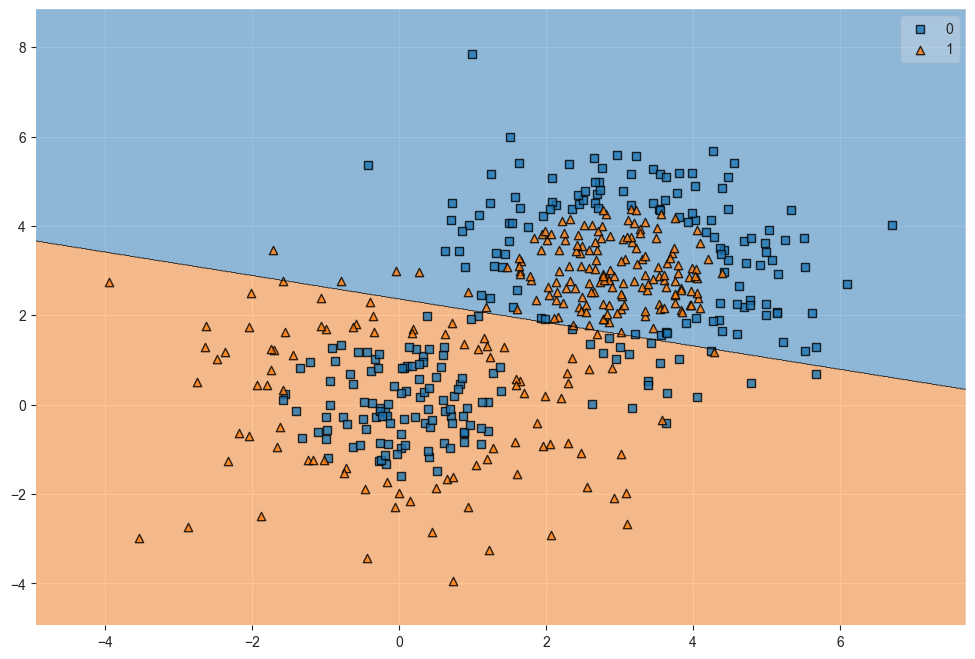

In [30]:
plot_decision_regions(X=np.array(X), y=np.array(Y, dtype = "int"), clf=model)

**Задание 2.** Разделите обучающую выборку и обучите 6 моделей kNN с различным числом соседей из `all_k`, сохраните обученные классификаторы в список. \
Выведите accuracy на тренировочной и тестовой выборке для каждой модели. Каково оптимальное число соседей с точки зрения accuracy?

In [33]:
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
all_k = [1, 3, 10, 30, 40, 60]
classifier = []
for i in all_k:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    classifier.append(model)
    print(f"Accuracy train для {i} соседей: {np.mean(model.predict(X_train) == y_train).round(3)}")
    print(f"Accuracy test для {i} соседей: {np.mean(model.predict(X_test) == y_test).round(3)}")

Accuracy train для 1 соседей: 1.0
Accuracy test для 1 соседей: 0.89
Accuracy train для 3 соседей: 0.948
Accuracy test для 3 соседей: 0.87
Accuracy train для 10 соседей: 0.915
Accuracy test для 10 соседей: 0.85
Accuracy train для 30 соседей: 0.852
Accuracy test для 30 соседей: 0.74
Accuracy train для 40 соседей: 0.8
Accuracy test для 40 соседей: 0.75
Accuracy train для 60 соседей: 0.692
Accuracy test для 60 соседей: 0.73


**Задание 3.** (бонусное) Скачайте библиотку [mlxtend](http://rasbt.github.io/mlxtend/#examples) для визуализации решающих поверхностей. 
В документации можно ознакомиться с [примерами](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) изображения решающих поверхностей для различных моделей. \
Построим несколько таких графиков для шести обученных нами kNN.

1. Подберите параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
2. Удобно перед визулизацией сохранить обученные классификаторы в список `all_clfs`.
3. Проявите терпение! Отрисовка решающих поверхностей может занимать пару минут.

In [ ]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

In [ ]:
### Your code is here




1. Как меняется решающая поверхность с ростом числа соседей?
2. Какое оптимальное число соседей с точки зрения устройства данных и геометрии решающих поверхностей? Поясните свой ответ, опираясь на полученные графики.
3. Лучше ли справляется kNN по сравнению с логистической регрессией?

**Задание 4.** Скачайте уже известный вам датасет [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). Обучите классификатор kNN на отнормированных и не отнормированных данных, подобрав лучшие гиперпараметры среди $k \in [1, 5, 10]$. Замерьте качество на тестовой выборке. \
Почему нормирование данных помогает улучшить качество?

In [ ]:
df = pd.read_csv('processed_sigma_cabs.csv')
df.head()

In [ ]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [ ]:
### Your code is here







**Задание 5.** Обучите классификатор kNN на отнормированных данных с помощью метрики Минковского. 
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

Значение параметра `p` возьмите равным единице. Замерьте качество на тестовой выборке и сравните с предыдущим заданием, где `p = 2`.

In [ ]:
### Your code is here





**Задание 6.** Скачайте датасет [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), в котором мы будем предсказывать среднюю стоимость жилья. В качестве признаков будем использовать `['longitude', 'latitude']`, посмотрите на них с помощью scatterplot. \
По какой характеристике наш kNN регрессор в этом случае подбирает соседей?

1. Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках.
2. Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры $k \in [1, 2, ..., 9]$. 
3. Обучите kNN регрессор с гауссовским ядром, взяв параметр k из предыдущего пункта и подобрав оптимальное значение ширины окна среди предложенных $h \in np.arange(0.02, 0.1, 0.01)$.

Как ширина окна влияет на веса при усреднении ответа по соседям? 

In [ ]:
df = pd.read_csv('housing.csv')
df.head()

In [ ]:
X = df[['longitude', 'latitude']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)
sns.scatterplot('longitude', 'latitude', data=X, hue=y);

In [ ]:
### Your code is here

